# Difference in Palermo Scale between Large and Small Asteroids

### Introduction

Asteroids, meteorites flying through space, are important to track as the ones that have collided with the earth in the past have critically changed the Earth’s biosphere (Yeomans 1998) and its craters have been important analytical tools to explain our solar systems past (AMNH n.a). With the danger that a large asteroid could bring to earth, planetary defence analytics is important, and knowing how to prioritise which near-earth objects to look out for is essential in a time crunch (Yeomans 1998). Our inferential question is whether the magnitude of an asteroid affects the number of potential impacts that it will have with Earth. Given our question, the population of interest will be the asteroids that have currently been prioritised analytically to have a possibility of intersecting with the earth’s trajectory over a 100 year period. In our report, we will also be exploring a metric called the Palermo Scale, this hazard scale is used to help NEO specialists prioritise any risks of potential impact encompassing a lot of dates and probabilities (NASA n.d). It essentially compares how likely it is for objects with a possibility of impact with the average risk of similar sized objects from previous dates (NASA n.d). In order to help us answer our inferential question, we will be dividing the data into two groups by asteroid size. Splitting the data into “large” and “small” categories based on if the asteroid is larger or smaller than the median asteroid magnitude will help us come to a conclusion more clearly on if magnitude truly affects potential impact possibility. Based on our chosen response variable, our location and scale parameter will be the mean and standard deviation of the Palermo Scale, respectively.Because of our inferential question, we can state that our null hypothesis will be that there is no difference in the Palermo scale between large and small asteroids. The significance level that we will be using to conduct this hypothesis test will be 0.05, we will be using this significance level because we want a lower risk of committing a type I error. The dataset we will be using for this report is the “Possible Asteroid Impacts with Earth” dataset found on Kaggle. While there are 10 variables provided in the data, we will only be focusing on the asteroid magnitude, maximum palermo scale, asteroid size, and possible impact columns. 

The Palermo Scale compares the likelihood of the detected potential impact with the average risk posed by objects of the same size or larger over the years until the date of the potential impact. This average risk from random impacts is known as the background risk. For convenience the scale is logarithmic, so, for examples, a Palermo Scale value of -2 indicates that the detected potential impact event is only 1% as likely as a random background event occurring in the intervening years, a value of zero indicates that the single event is just as threatening as the background hazard, and a value of +2 indicates an event that is 100 times more likely than a background impact by an object at least as large before the date of the potential impact in question. Since all the values in the dataset are negative, we take the absolute value of the palermo scale to make it easier to interpret. Therefore now, the smaller the value to more likely it is to impact Earth and be dangerous.

The Palermo scale was chosen as the metric because it quantifies the relative risk of a NEO over a period of time. It is trustworthy because it is widely recognized by NEO specialists as the predominant metric for quantifying the level of concern. <br>
The Sentry system used to monitor potential asteroid collisions is less accurate at calculating the elliptical path and the trajectory of the smaller asteroids. This may result in the group with the small asteroids not being a good representation of the true risk represented by the Palermo scale. <br>
We expect to find a higher Palermo scale for asteroids with higher magnitude. This could help analysts more quickly recognize possible harmful asteroids vs benign ones based purely on magnitude. This leads to further questions such as what other parameters influence the Palermo scale, and could this analysis apply to other objects floating above Earth, like the 100 trillion trash and satellites (Kluger 2023), that have an equal chance of colliding and causing damage to Earth?

### Methods, Results and Discussion

In [58]:
# Here we are loading all libraries needed to run the remaining code
library(tidyverse)
library(broom)
library(infer)

In [59]:
# We are loading our dataframe from our github page in which we have downloaded the dataset in
url <- 'https://raw.githubusercontent.com/arulh/STAT-201-project/main/data/impacts.csv'
df <- read.csv(
    url
)


Here we are creating a new column called asteroid_size. The values are "large" if the Asteroid is larger than the median asteroid magnitude and "small" if smaller or equal to the Median Magnitude. This is needed when coming up with our hypothesis test.

In [60]:
# We find the median maginitude of the asteroid in order to classify each asteroid as large or small
median_magnitude <- median(df$Asteroid.Magnitude)

# Here we are altering our dataframe to include the new asteroid size column and only select the columns required
df <- df %>%
    mutate(asteroid_size = if_else(df$Asteroid.Magnitude > median_magnitude, 'large', 'small')) %>%
    mutate(Maximum.Palermo.Scale = abs(Maximum.Palermo.Scale)) %>% #Since all our values are negative we take the absolute value to make it easier to interpret
    select(asteroid_size, Maximum.Palermo.Scale) 

head(df)

,asteroid_size,Maximum.Palermo.Scale
,<chr>,<dbl>
1,large,8.31
2,large,6.96
3,large,6.87
4,large,6.95
5,small,4.30
6,small,5.51


In [61]:
### Getting Location and Scale Parameters

In [76]:
# Creating a function that can calculate the mode
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}


# Creating table with all parameters
mean_values <- df %>%
    group_by(asteroid_size) %>%
    summarize(sample_size = n(),
            mean_Palermo_Scale = mean(Maximum.Palermo.Scale), # gets the mean of the two asteroid size groups
             median_Palermo_Scale = median(Maximum.Palermo.Scale), # gets the median of the two asteroid size groups
             mode_Palermo_Scale = getmode(Maximum.Palermo.Scale), # gets the mode of the two asteroid size groups
             twenty_fifth_percentile = quantile(Maximum.Palermo.Scale, probs = .25), # gets the 25th percentile of the two asteroid size groups
             seventy_fifth_percentile = quantile(Maximum.Palermo.Scale, probs = .75), # gets the 75th percentile of the two asteroid size groups
             standard_deviation = sd(Maximum.Palermo.Scale), # gets the standard deviation of the two asteroid size groups
             inter_quartile_range_50 = seventy_fifth_percentile - twenty_fifth_percentile) # gets the inter quartile range from 25-75th percentile of the two asteroid size groups

mean_values


asteroid_size,sample_size,mean_Palermo_Scale,median_Palermo_Scale,mode_Palermo_Scale,twenty_fifth_percentile,seventy_fifth_percentile,standard_deviation,inter_quartile_range_50
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
large,340,7.269176,7.25,7.50,6.35,8.0825,1.335189,1.7325
small,343,6.342915,6.34,6.43,5.38,7.3100,1.466209,1.9300


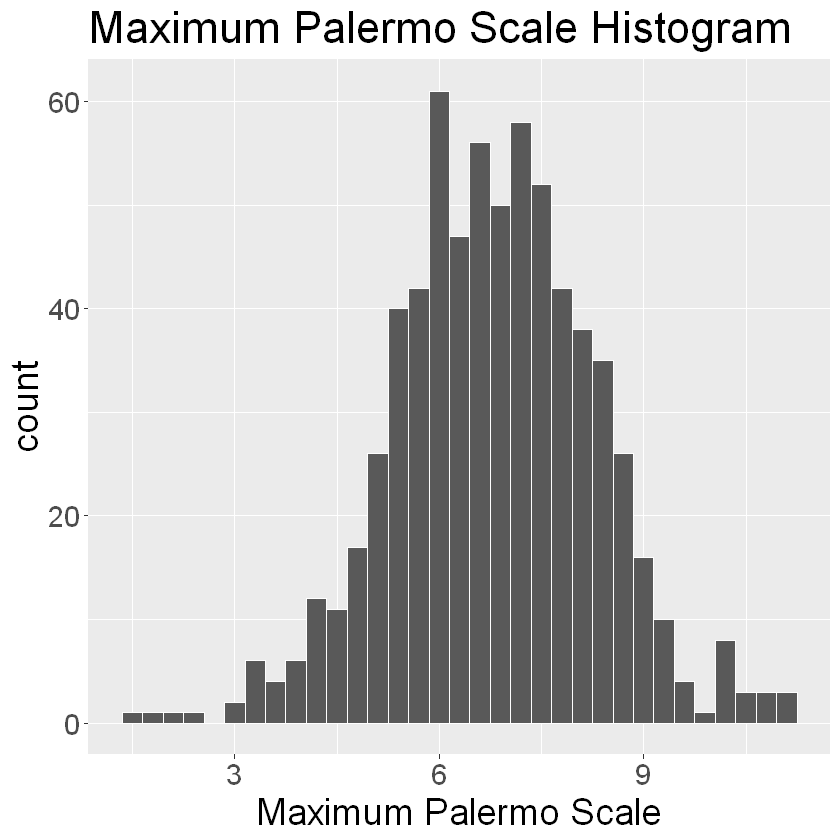

In [63]:
## Getting Histogram of the overall distibution
histogram <- 
    df %>% 
    ggplot() + 
    geom_histogram(aes(x=Maximum.Palermo.Scale), binwidth = 0.3, color="white") +
    xlab("Maximum Palermo Scale") + 
    theme(text = element_text(size=22)) + 
    ggtitle("Maximum Palermo Scale Histogram")

histogram

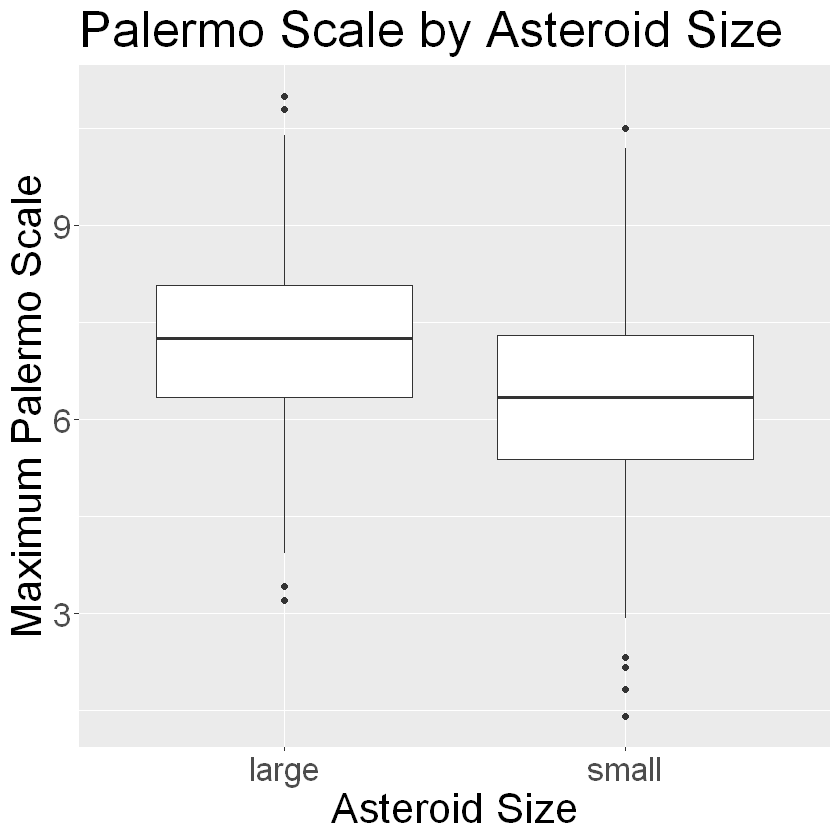

In [64]:
## Getting Boxplot for both large and small asteroids
boxplots <- 
   df %>%  
   ggplot(aes(x = asteroid_size, y = Maximum.Palermo.Scale)) + 
   geom_boxplot() + 
   ylab("Maximum Palermo Scale") +
   ggtitle("Palermo Scale by Asteroid Size") +
    xlab("Asteroid Size") +
   theme(text = element_text(size=25))

boxplots

Our boxplot suggests that the asteroids classified as large have a larger absolute value of Maximum Palermo Scale than the asteroids classified as small. This indicates that smaller asteroids are more likely to impact with Earth and cause damage than large asteroids.

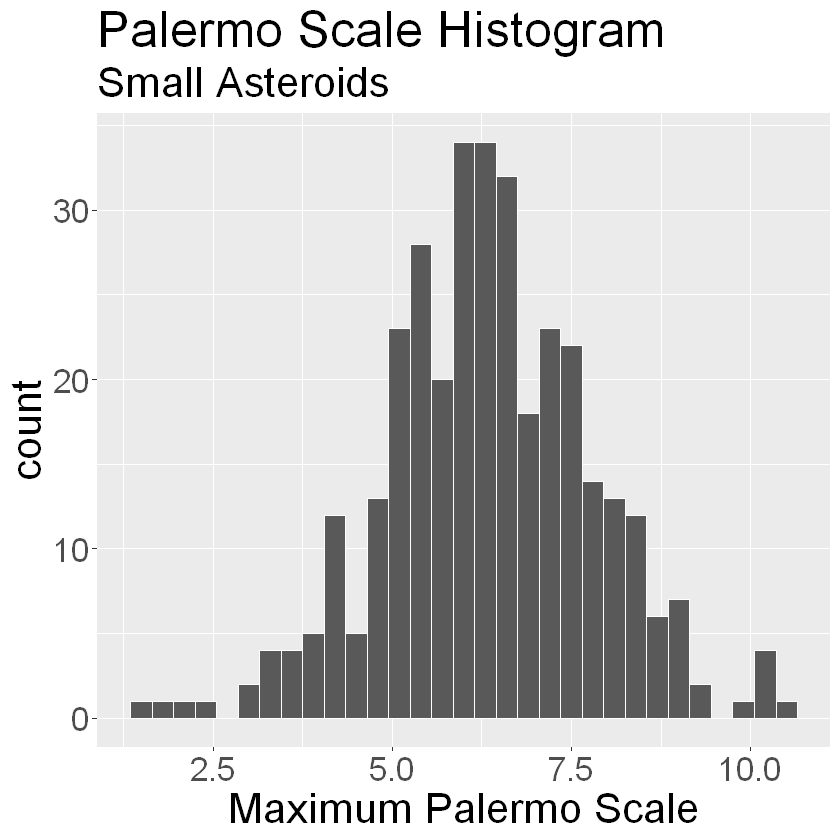

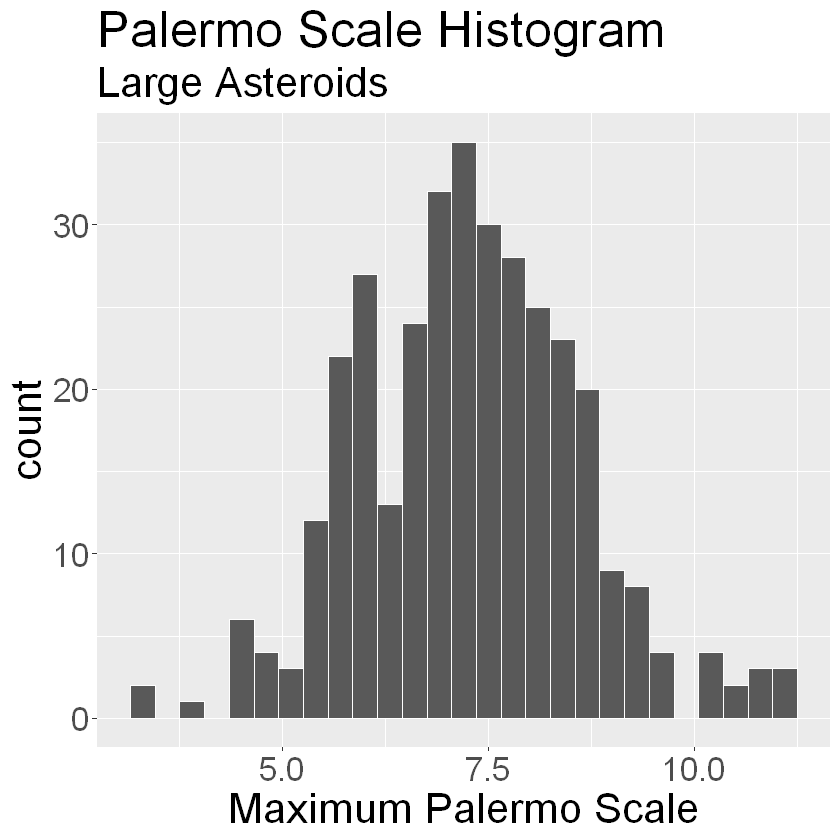

In [65]:
# Getting histogram of only the asteroids classified as small asteroids
histogram_small_asteroid <- 
    df %>% 
    filter(asteroid_size == "small") %>%
    ggplot() + 
    geom_histogram(aes(x=Maximum.Palermo.Scale), binwidth = 0.3, color="white") +
    xlab("Maximum Palermo Scale") + 
    theme(text = element_text(size=25)) + 
    ggtitle("Palermo Scale Histogram", subtitle = "Small Asteroids")

# Getting histogram of only the asteroids classified as large asteroids
histogram_large_asteroid <- 
    df %>% 
    filter(asteroid_size == "large") %>%
    ggplot() + 
    geom_histogram(aes(x=Maximum.Palermo.Scale), binwidth = 0.3, color="white") +
    xlab("Maximum Palermo Scale") + 
    theme(text = element_text(size=25)) + 
    ggtitle("Palermo Scale Histogram", subtitle = "Large Asteroids")

histogram_small_asteroid
histogram_large_asteroid



As we can see above, the distribution of the max palermo scale roughly follows a normal distribution. This also holds when creating individual histograms for the large and small asteroids.

In [66]:
### Bootstrap Distribution

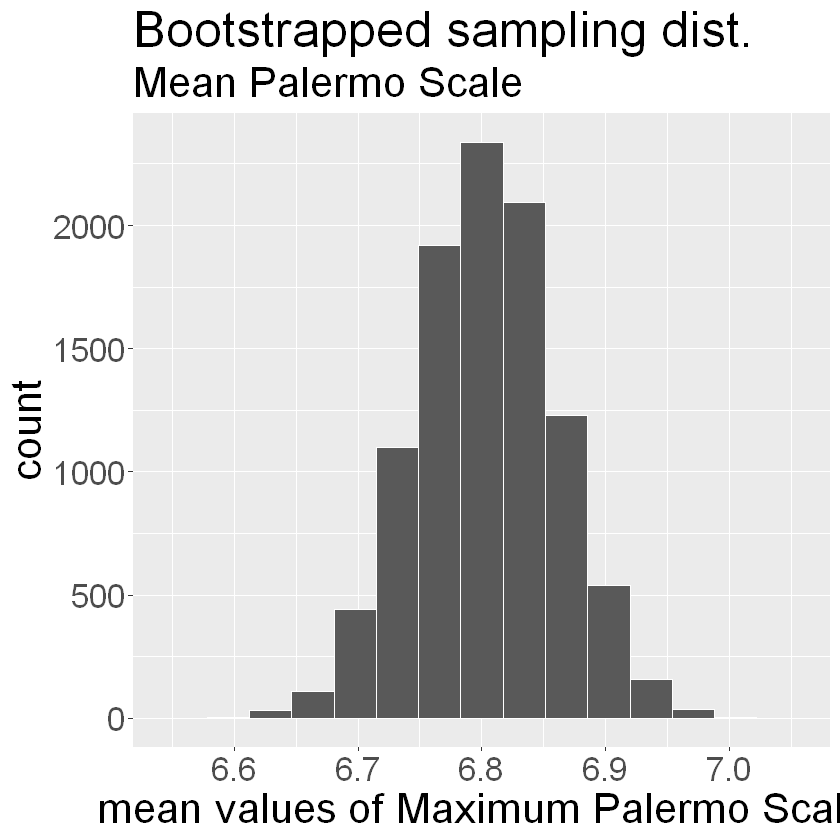

In [70]:
### Bootstrap Distribution
### We are taking 10,000 rep;icates of samples (selecting from our original data with replacement) to be able to get an estimate of how our 
### sampling distribution would look like
set.seed(1)

sample_dist <- 
    df %>% 
    specify(response = Maximum.Palermo.Scale) %>% 
    generate(type = "bootstrap", reps = 10000) %>% 
    calculate(stat = "mean")

bootstrap_dist <- 
    sample_dist %>% 
    ggplot() + 
    geom_histogram(aes(x=stat), bins = 15, color="white") +
    xlab("mean values of Maximum Palermo Scale") + 
    theme(text = element_text(size=25)) + 
    ggtitle("Bootstrapped sampling dist.", subtitle = "Mean Palermo Scale")

bootstrap_dist

From the absolute value of the maximum Palermo scale of large and small asteroids, we will perform a hypothesis test to conclude whether the small asteroid has a larger chance of impact on the earth than large asteroids:

The two hypothesis are:

- $H_0: \mu_{large} - \mu_{small} = 0$
- $H_a: \mu_{large} - \mu_{small} > 0$

Since the asteroids are different and independent of each other, we will be performing a two-sample t-test on each large or small asteroids.


In [68]:
# Determining the test statistic

large_asteroids <- df |>
    filter(asteroid_size == "large")

small_asteroids <- df |>
    filter(asteroid_size == "small")

test_statistic <-
    (mean_values$mean_Palermo_Scale[1] - mean_values$mean_Palermo_Scale[2])/sqrt(mean_values$standard_deviation[1]^2/mean_values$sample_size[1] + mean_values$standard_deviation[2]^2/mean_values$sample_size[2])
test_statistic

asteroidttest <-
    tidy(
        t.test(x = large_asteroids$Maximum.Palermo.Scale,
               y = small_asteroids$Maximum.Palermo.Scale,
               alternative = "greater"))

asteroidttest

[1] 8.633349

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.926261,7.269176,6.342915,8.633349,2.128731e-17,676.1635,0.7495446,Inf,Welch Two Sample t-test,greater


From the above table we see that we get a p-value of 2.128731e-17. With a sigificance level of 0.05, thi sp-value would mean that we reject the null hypothesis in favour of the alternative hypothesis. It is important to note that we are not accepting the alternative hypothesis. However we can reject that the absolute value of the polermo scale is the same for both large and small asteroids.

Warning message:
"You have given `type = "bootstrap"`, but `type` is expected to be `"permute"`. This workflow is untested and the results may not mean what you think they mean."


replicate,stat
<int>,<dbl>
1,0.9746926
2,0.8921599
3,0.9296438
4,0.8974665
5,0.8761966
6,1.1466677


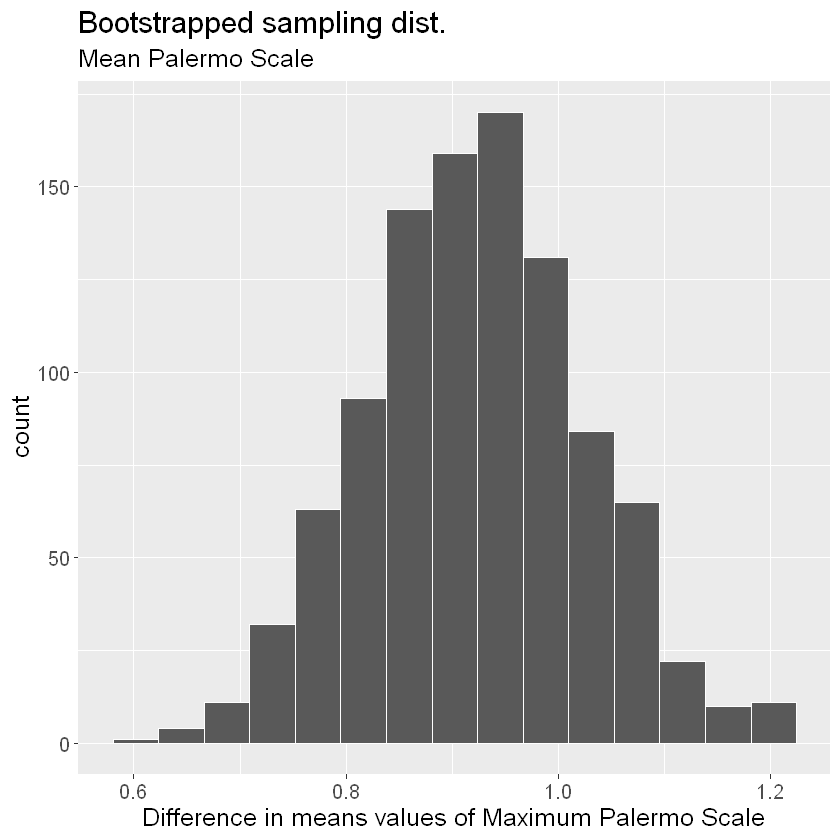

In [74]:
### Bootstrap Distribution
### We are taking 10,000 rep;icates of samples (selecting from our original data with replacement) to be able to get an estimate of how our 
### sampling distribution would look like

set.seed(1)

obs_diff_in_means <- 
   df %>% 
   specify(formula = Maximum.Palermo.Scale ~ asteroid_size) %>% 
   calculate(stat="diff in means", order = c("large", "small"))


null_diff_in_means <- 
   df %>% 
   specify(formula = Maximum.Palermo.Scale ~ asteroid_size) %>% 
    hypothesize(null = "independence") %>% 
   generate(type="bootstrap", reps = 1000) %>% 
   calculate(stat="diff in means", order = c("large", "small"))

bootstrap_dist <- 
    null_diff_in_means %>% 
    ggplot() + 
    geom_histogram(aes(x=stat), bins = 15, color="white") +
    xlab("Difference in means values of Maximum Palermo Scale") + 
    theme(text = element_text(size=15)) + 
    ggtitle("Bootstrapped sampling dist.", subtitle = "Mean Palermo Scale")


head(null_diff_in_means)
bootstrap_dist

From the plot above it looks like our bootstrap follows a normal distribution as expecting the the mean approximately at 0.9 which is the same as what the difference in means was throughout our entire dataset

In [75]:
# Getting the 80% confidence interval of our bootstrap
print("80% Confidence Interval:")
ci_80 <- 
    null_diff_in_means %>% 
    summarise(lower_ci = quantile(stat, 0.1), upper_ci = quantile(stat, 0.9))
ci_80

# Getting the 95% confidence interval of our bootstrap
print("95% Confidence Interval:")
ci_95 <- 
    null_diff_in_means %>% 
    summarise(lower_ci = quantile(stat, 0.05), upper_ci = quantile(stat, 0.95))
ci_95

# Getting the 99% confidence interval of our bootstrap
print("99% Confidence Interval:")
ci_99 <- 
    null_diff_in_means %>% 
    summarise(lower_ci = quantile(stat, 0.01), upper_ci = quantile(stat, 0.99))
ci_99

[1] "80% Confidence Interval:"


lower_ci,upper_ci
<dbl>,<dbl>
0.7847065,1.055271


[1] "95% Confidence Interval:"


lower_ci,upper_ci
<dbl>,<dbl>
0.7538397,1.088244


[1] "99% Confidence Interval:"


lower_ci,upper_ci
<dbl>,<dbl>
0.6937215,1.184958


We get the value of 3 different confidence intervals above (80%, 95%, 99%). What does this mean? If we take an infinite amount of samples, in 80% of them, the difference in the means of the two groups would lie with our 80% confidence inteval of (0.7847065, 1.055271). <br>
The same interpretation goes for our 95% (0.7538397, 1.088244) and 99% (0.6937215, 1.184958) interval. <br>
The biggest note to take from the confidence intervals is that even at the 99% confidence interval (the widest one), we still get a difference above 0. Hence our bootstrapping confidence intervals are suggesting that there is a positive difference in our palermo scale between large and small asteroids.

### Discussion continued (Bootstrapping vs Asymptotics) <br>

Both bootstrapping and asymptotics can be appropriate in different situations, depending on the nature of the data and the research question. Bootstrapping can be useful when the sample size is small or when the population distribution is unknown or non-normal. However in our case we have a very large sample size that has a normal distribution, suggesting that the population distribution is normal as well. Overall we found that the asymptotic method was computationally efficient and easier to implement and explain. However if our data set was small or not normal than bootstrapping would most likely give us a better estimate of the difference in means. <br>

Additionally, bootstrapping relies on resampling from the original data, which means that any biases or errors in the original data will be propagated to the bootstrapped estimates. <br>

However that being said, bootstrapping gave us a confidence interval from our many replicates of samples we pulled from our original dataset. This gave us a range for the difference in means at a certain confidence level rather than just a singular value which can be beneficial when working with important values such a the palermo scale. <br>

Our bootstrapping method and asymptotics method both concluded that there is a difference in the palermo scale between large and small asteroids. This makes sense as all the assumptions were met for the asymptotics. <br>

Overall bootstrapping may be more reliable as it does not depend on the distribution of the population. Hence even if our large sampole size does not represent the population distribution, bootstrapping results would still be significant whereas asymptotics would not

Overall the results is what we expected. Smaller asteroids are more likely to hit Earth and cause damage than large asteroids. Both the bootstrap methods and asymptotic method suggest this result. <br>

That being said, we are only rejecting the null hypothesis and not accepting the alternative hypothesis and hence a lot more research can be done on this topic such as what else can influence the palermo scale and what can be done to prevent cases of dangerous palermo scaled asteroids and detected. <br>

Additionally to that, even further research can be done such as could this analysis apply to other objects floating above Earth, like the 100 trillion trash and satellites (Kluger 2023), that have an equal chance of colliding and causing damage to Earth? 

### References

Kluger, Jeffrey. “Scientists Sound Alarm over a Growing Trash Problem in Space.” Time, Time, 13 Mar. 2023, <br> https://time.com/6262389/space-junk-increasing-problem/.  

“Palermo Technical Impact Hazard Scale.” NASA, NASA, https://cneos.jpl.nasa.gov/sentry/palermo_scale.html 


“Why Study Impact Craters?: AMNH.” American Museum of Natural History, https://www.amnh.org/exhibitions/permanent/meteorites/meteorite-impacts/earth-impacts/why-study-impact-craters#:~:text=Craters%20are%20windows%20into%20the,geological%20history%20of%20those%20bodies.   

Yeomans, Donald K. “Why Study Asteroids?” NASA, NASA, April. 1998, https://ssd.jpl.nasa.gov/sb/why_asteroids.html#:~:text=The%20scientific%20interest%20in%20asteroids,Earth's%20biosphere%20in%20the%20past.   
